In [9]:
# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
S = 20 # Number of steps
alpha = 0.01 # Learning rate

# Function
f = lambda x: x**4 - 6*x**2 + 4*x + 18

# Take derivatives manually
df = lambda x: 4*x**3 - 12*x + 4

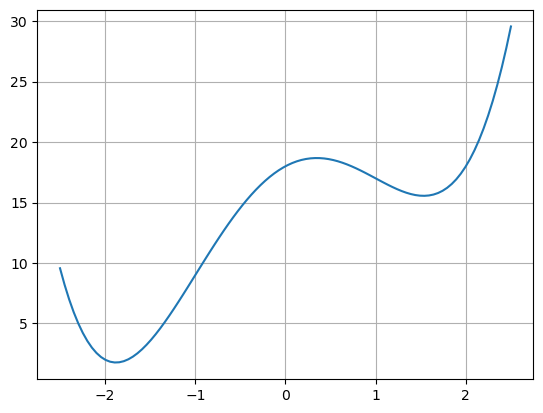

In [3]:
# Plot the function
x_range = np.linspace(-2.5, 2.5, 100)
plt.plot(x_range, f(x_range))
plt.grid(True)

In [8]:
x = np.empty((S+1,))

# Initial point
x[0] = 1
print('>>> Running GD with starting value x =', x[0], 'and learning rate alpha =', alpha)

# S steps of GD on function f(x)
for i in range (1, S+1):
    x[i] = x[i-1] - alpha * df(x[i-1])
    print('Step', i, 'x = ', x[i], 'f(x) = ', f(x[i]))

>>> Running GD with starting value x = 1.0 and learning rate alpha = 0.01
Step 1 x =  1.04 f(x) =  16.84025856
Step 2 x =  1.0798054400000001 f(x) =  16.682851897094334
Step 3 x =  1.119020840068549 f(x) =  16.530861492173784
Step 4 x =  1.1572534830439267 f(x) =  16.387152244708915
Step 5 x =  1.1941304973887767 f(x) =  16.254162806484764
Step 6 x =  1.229315454262303 f(x) =  16.13373816834498
Step 7 x =  1.262522837530415 f(x) =  16.027028821639956
Step 8 x =  1.2935289442241535 f(x) =  15.93446856222769
Step 9 x =  1.3221782260494936 f(x) =  15.855828153659868
Step 10 x =  1.3483847002782723 f(x) =  15.790328788009905
Step 11 x =  1.372128707840095 f(x) =  15.736791016005489
Step 12 x =  1.3934498428239785 f(x) =  15.693793045012892
Step 13 x =  1.4124372242060033 f(x) =  15.659816283499957
Step 14 x =  1.4292183920198969 f(x) =  15.633363464226218
Step 15 x =  1.4439480114680723 f(x) =  15.613042922596875
Step 16 x =  1.4567973253950453 f(x) =  15.597619534954735
Step 17 x =  1.467

In [10]:
# Problem 2

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LassoCV, RidgeCV, LinearRegression
from sklearn.metrics import mean_squared_error

In [13]:
data = pd.read_csv('College.csv')

In [25]:
print(data.head())

  Private  Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
0     Yes  1660    1232     721         23         52         2885   
1     Yes  2186    1924     512         16         29         2683   
2     Yes  1428    1097     336         22         50         1036   
3     Yes   417     349     137         60         89          510   
4     Yes   193     146      55         16         44          249   

   P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  Terminal  \
0          537      7440        3300    450      2200   70        78   
1         1227     12280        6450    750      1500   29        30   
2           99     11250        3750    400      1165   53        66   
3           63     12960        5450    450       875   92        97   
4          869      7560        4120    800      1500   76        72   

   S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0       18.1           12    7041         60  
1       12.2           16   10527         56  
2    

In [21]:
# Set data and grid
Y = data['Apps']
X = data.drop('Apps', axis = 1)
X['Private'] = X['Private'] == 'Yes'

In [27]:
# Split train test dataset
Y_train = Y[:600]
X_train = X[:600]
Y_test = Y[600:]
X_test = X[600:]

# Set the penalization parameter
alphas = np.linspace(0.01, 60, 1000)

In [29]:
# OLS
reg_ols = LinearRegression().fit(X_train, Y_train)
print('OLS: test MSE = ', mean_squared_error(Y_test, reg_ols.predict(X_test)))

OLS: test MSE =  1502077.4348215738


LASSO: test MSE =  1502356.4555399301


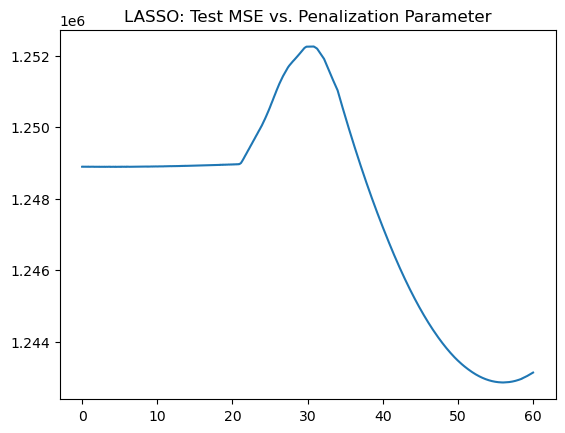

In [37]:
# Lasso (20-fold cv)
reg_lasso = LassoCV(cv = 20, random_state = 0, alphas = alphas).fit(X_train, Y_train)
print('LASSO: test MSE = ', mean_squared_error(Y_test, reg_lasso.predict(X_test)))
plt.plot(reg_lasso.alphas, np.mean(reg_lasso.mse_path_, axis = 1))
plt.title('LASSO: Test MSE vs. Penalization Parameter')
plt.show()

RIDGE: test MSE =  1504969.7855622834


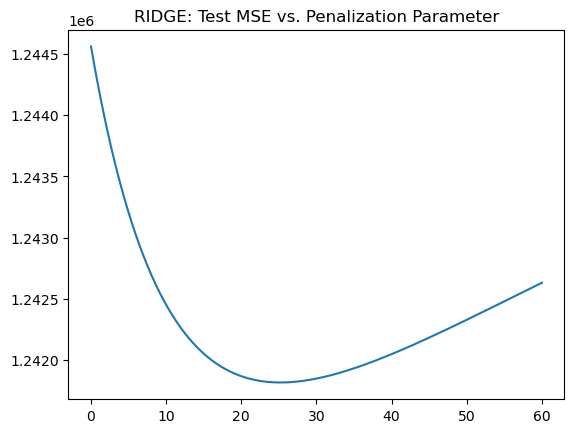

In [36]:
# Ridge (leave-one-out cross-validation)
reg_ridge = RidgeCV(cv = None, alphas = alphas, store_cv_values = True).fit(X_train, Y_train)
print('RIDGE: test MSE = ', mean_squared_error(Y_test, reg_ridge.predict(X_test)))
plt.plot(reg_ridge.alphas, np.mean(reg_ridge.cv_values_, axis = 0))
plt.title('RIDGE: Test MSE vs. Penalization Parameter')
plt.show()